<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar100.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([19, 29,  0, 11,  1])

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo",
    "computer_keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree",
    "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree",
    "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit",
    "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk",
    "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table",
    "tank", "telephone", "television", "tiger", "tractor", "train", "trout", "tulip", "turtle",
    "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]


In [9]:
def plot_sample(X, y, index, classes):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[int(y[index])])  # Convert y[index] to integer before indexing classes
    plt.show()

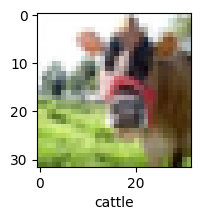

In [10]:
plot_sample(X_train, y_train, 0, classes)


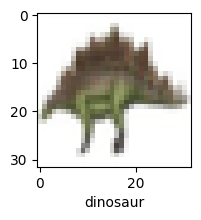

In [11]:
plot_sample(X_train, y_train, 1, classes)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [14]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN architecture
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Compile the model
cnn.compile(optimizer=optimizers.Adam(lr=0.001),  # Adjust learning rate here
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model Checkpoint
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with data augmentation
history = cnn.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) / 64,
    epochs=100,  # Increase number of epochs
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler, early_stopping, checkpoint]
)

# Evaluate the model
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/100
782/781 [==============================] - ETA: 0s - loss: 4.0115 - accuracy: 0.1281
Epoch 1: val_accuracy improved from -inf to 0.15990, saving model to best_model.h5
781/781 [==============================] - 656s 836ms/step - loss: 4.0115 - accuracy: 0.1281 - val_loss: 3.7170 - val_accuracy: 0.1599 - lr: 0.0010
Epoch 2/100
782/781 [==============================] - ETA: 0s - loss: 3.1101 - accuracy: 0.2429
Epoch 2: val_accuracy improved from 0.15990 to 0.31610, saving model to best_model.h5
781/781 [==============================] - 648s 830ms/step - loss: 3.1101 - accuracy: 0.2429 - val_loss: 2.7171 - val_accuracy: 0.3161 - lr: 0.0010
Epoch 3/100
782/781 [==============================] - ETA: -6s - loss: 2.6883 - accuracy: 0.3200
Epoch 3: val_accuracy improved from 0.31610 to 0.33720, saving model to best_model.h5
781/781 [==============================] - 6791s 9s/step - loss: 2.6883 - accuracy: 0.3200 - val_loss: 2.5949 - val_accuracy: 0.3372 - lr: 0.0010
Epoch 4/100

KeyboardInterrupt: 

In [15]:
# Evaluate the model
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 52s 165ms/step - loss: 1.4835 - accuracy: 0.6014
Test Accuracy: 0.6014000177383423


In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 52s 166ms/step


array([[4.32408655e-07, 5.54802682e-06, 7.65022077e-03, 2.94475351e-04,
        8.03165545e-04, 3.24245921e-05, 1.58697643e-04, 9.76007839e-04,
        7.78425951e-03, 1.90339397e-05, 5.40782366e-06, 1.08475005e-03,
        3.66431475e-01, 2.72737304e-03, 1.23929945e-04, 2.87506031e-04,
        5.15557658e-05, 4.98649059e-03, 2.57516443e-03, 1.01906262e-05,
        5.05139587e-06, 3.54299118e-04, 4.95234272e-04, 4.31224544e-05,
        6.45209046e-04, 2.80770873e-05, 1.21112527e-04, 1.21403637e-03,
        2.74785430e-06, 9.00565865e-05, 7.94753060e-02, 1.30699656e-04,
        2.65364349e-03, 6.85793639e-05, 5.55703446e-05, 7.99752865e-03,
        6.18091190e-06, 2.50932644e-03, 5.27944008e-04, 1.11594090e-04,
        1.18828274e-03, 6.52940726e-05, 2.05110373e-05, 8.96159690e-05,
        7.09606195e-03, 1.27905735e-03, 1.02945594e-02, 4.47727416e-06,
        2.04627425e-03, 2.05639210e-02, 2.07732501e-05, 1.36163580e-05,
        1.30709413e-05, 2.40186478e-06, 3.40566294e-05, 5.685512

In [17]:
# Assuming 'model' is your trained Keras model
cnn.save("best_model.h5")


In [1]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

NameError: name 'y_pred' is not defined

In [19]:
y_test[:5]

array([49, 33, 72, 51, 71])

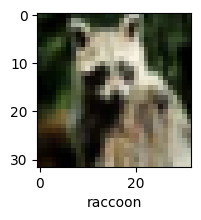

In [20]:
plot_sample(X_test, y_test, 345, classes)


In [22]:
classes[y_classes[345]]

'raccoon'

Shape of training images: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)
Similar Images:


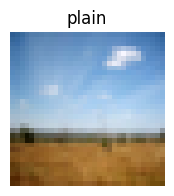

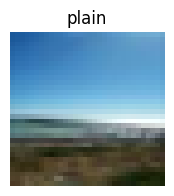

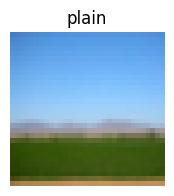

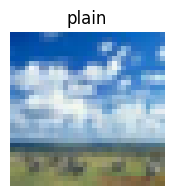

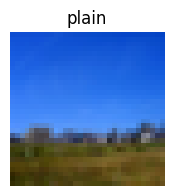

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Load trained model
model = load_model('best_model.h5')

# Load CIFAR-100 dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.cifar100.load_data()

# CIFAR-100 dataset mein total 100 classes hain
num_classes = 100

# Classes ka label information
class_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar',
    'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Shape of CIFAR-100 dataset
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)


# Function to preprocess image for prediction
def preprocess_image(img):
    if isinstance(img, str):  # Check if input is file path
        img = image.load_img(img, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array


# Function to extract features from images
def extract_features(images):
    features = []
    for img_data in images:
        preprocessed_img = preprocess_image(img_data)
        # feature = model.predict(preprocessed_img).flatten()
        features.append(preprocessed_img)
    return np.array(features)


# Function to find similar images
def find_similar_images(query_img_path, dataset_images, top_k=5):
    query_feature = extract_features([query_img_path])
    dataset_features = extract_features(dataset_images)
    query_feature = query_feature.flatten()  # Flatten the query feature
    distances = []
    for feature in dataset_features:
        feature = feature.flatten()  # Flatten the dataset feature
        dist = distance.cosine(query_feature, feature)
        distances.append(dist)
    indices = np.argsort(distances)[:top_k]
    similar_images = [(dataset_images[i], train_labels[i][0]) for i in indices]
    return similar_images


# Function to plot a sample image with its class label
def plot_sample(img, label, class_labels):
    plt.figure(figsize=(15, 2))
    plt.imshow(img)
    plt.title(class_labels[label])
    plt.axis('off')
    plt.show()


# Example usage
query_image_path = '''G:\\Images\\pexels-pixabay-46160.jpg'''
similar_images = find_similar_images(query_image_path, train_images, top_k=5)
print("Similar Images:")
for img_array, label_idx in similar_images:
    img = image.array_to_img(img_array)
    plot_sample(img, label_idx, class_labels)
